# 선형결합(linear combinations)과 생성(span),기저(basis)

**이 글에서는 n차원공간상에서의 선형결합이 어떠한 형태를 형성하는지에 대한 관점을 제공하려고 한다.**

먼저 단위 벡터에 대해 알아야한다.  
**단위벡터란?**  
- 차원에서 각각의 축에 대응되는 크기가 1인 벡터를 의미한다.
- 흔히 x축에 대응되는 벡터를 $\hat{i}$, y축에 대응되는 벡터를 $\hat{j}$라고 정의한다.


각 좌표를 스칼라로 생각해보고 직관을 발휘해보자.  
스칼라를 달리하여 단위벡터를 곱하고 합하는 과정을 지속한다고 했을 때, 만들 수 있는 2차원 벡터에는 어떤 것들이 있을까?

**정답은 모든 2차원 벡터이다.**  
그렇다면 이때 $\hat{i}$,$\hat{j}$은 기저벡터 또한 성립된다고 할 수 있는데 일단 이 부분은 넘어가자..  
<br/>
**그럼 이제 위의 내용이 옳은지 코드로 확인해보자.** 
(특정 상수의 상수배는 모든 수를 표현할 수 있음을 인지하고 있어야한다.)

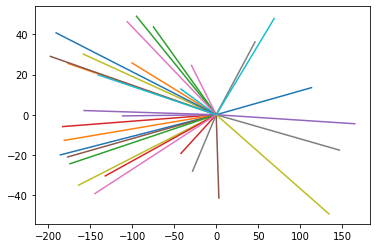

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

a=4
b=1

a_s=0
b_s=0

#반복횟수를 증가시키면서 확인해보자
for i in range(30):
    scale1 = np.random.uniform(-50,50)
    scale2 = np.random.uniform(-50,50)
    
    a_s=a*scale1
    b_s=b*scale2
    
    plt.plot([0,a_s],[0,b_s])
    
plt.show()

#### 시간상 다음에...(내용 추가 예정)